In [1]:
#mount
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import sys
root_dir="/content/gdrive/My Drive/Projects/flower"
sys.path.append(root_dir)

%cd "/content/gdrive/My Drive/Projects/flower/wm"

/content/gdrive/My Drive/Projects/flower/wm


In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import importlib
import tradestats
import pandas as pd
from datetime import datetime
import sys

In [14]:
#plot

from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['close']
  ys1= series['rose2open_trade']
  ys2= series['rose2close_trade']
  ys3= series['rose2rosehigh']
  ys4= series['rose2roselow']
  ys5= series['rose2climateU']
  ys6= series['rose2climateD']


  plt.plot(xs, ys, label=series_name, color=palette[1])
  plt.bar(xs, ys5, label=series_name, color='orange', width = 6)
  plt.bar(xs, ys6, label=series_name, color='black', width = 6)
  plt.bar(xs, ys3, label=series_name, color='blue', width = 4)
  plt.bar(xs, ys4, label=series_name, color='yellow', width = 4)
  plt.bar(xs, ys1, label=series_name, color='green', width = 2)
  bc = plt.bar(xs, ys2, label=series_name, color='red', width = 2)
  plt.ylim(bottom=ys.min()*0.9)
  return bc

def _plot_prices(from_year,until_year,name):
  fig, ax = plt.subplots(figsize=(20, 10.2), layout='constrained')
  masterFrame1 = masterFrame.loc[(masterFrame.year>=from_year) & (masterFrame.year<=until_year)]
  df_sorted = masterFrame1.sort_values('date', ascending=True)
  bc = _plot_series(df_sorted, '')
  ax.bar_label(bc, labels = (masterFrame1['rose2profit']*100).round(1),label_type='edge', padding=12)
  sns.despine(fig=fig, ax=ax)
  plt.xlabel('date')
  _ = plt.ylabel('close')
  plt.title(name)

def maxdownlen(df):
  xx1 = df.to_frame()
  xx1['cumprofit'] = 1.0
  xx1['downlen'] = 0
  #xx1.loc[(xx1.cumprofit<1),'downlen']    = xx1.downlen + 1
  xx1['end'] = False
  xx1['maxdown'] = 1.0
  #xx1.loc[(xx1.cumprofit>=1),'end']    = True
  history2 = len(xx1.index)
  for i in range(0,history2+1):
    xx1['profit_prev'] = xx1['rose2profit1'].shift(i)
    xx1.loc[np.isnan(xx1.profit_prev)==True,'end']  = True
    xx1.loc[(xx1.end == False)&(xx1.cumprofit*xx1.profit_prev>=1),'end']                        = True
    xx1.loc[(xx1.end == False)&(xx1.cumprofit*xx1.profit_prev<1),'downlen']                     = xx1.downlen + 1
    xx1.loc[(xx1.end == False)&(xx1.cumprofit*xx1.profit_prev<1)&(xx1.cumprofit*xx1.profit_prev<xx1.maxdown),'maxdown']   = xx1.cumprofit*xx1.profit_prev
    xx1.loc[(xx1.end == False)&(xx1.cumprofit*xx1.profit_prev<1),'cumprofit']                   = xx1.cumprofit*xx1.profit_prev


  return {"maxlen":xx1.downlen.max(),"maxdown":xx1.maxdown.min()}


In [6]:
importlib.reload(tradestats)
from tradestats import *
from tradestats import rose

rose([],[],onlytry=1)

10


In [20]:
importlib.reload(tradestats)
from tradestats import *
from tradestats import rose

calc_one = True
ignore1 = 3
entry_buy1 = 4
entry_sell1  = 4

history = 10
ignore_start = 1
ignore_max = 10
entry_b_start = 1
entry_b_max = 10
entry_s_start = 1
entry_s_max = 10
step = 1
if calc_one:
  ignore_start = ignore1
  ignore_max = ignore1 + 1
  entry_b_start = entry_buy1
  entry_b_max = entry_buy1 + 1
  entry_s_start = entry_sell1
  entry_s_max = entry_sell1 + 1
#filenames = ['wig_w.csv','wig20_w.csv','mbk_w.csv','alr_w.csv','pko_w.csv','peo_w.csv','pkn_w.csv','san_w.csv','pzu_w.csv','pge_w.csv','pco_w.csv','opl_w.csv','lpp_w.csv','kru_w.csv','kgh_w.csv','jsw_w.csv','kty_w.csv','dnp_w.csv','cps_w.csv','cdr_w.csv','acp_w.csv','ale_w.csv']
#filenames = ['wig_d.csv','wig20_d.csv','mbk_d.csv','alr_d.csv','pko_d.csv','peo_d.csv','pkn_d.csv','san_d.csv','pzu_d.csv','pge_d.csv','pco_d.csv','opl_d.csv','lpp_d.csv','kru_d.csv','kgh_d.csv','jsw_d.csv','kty_d.csv','dnp_d.csv','cps_d.csv','cdr_d.csv','acp_d.csv','ale_d.csv']
#filenames = ['spx_w.csv','wig20short_w.csv','wig20lev_w.csv','tbsp_w.csv','swig80tr_w.csv','wigtechtr_w.csv','ndq_w.csv','mwig40tr_w.csv','dax_w.csv','wig20tr_w.csv']
#filenames = ['spx_d.csv','wig20short_d.csv','wig20lev_d.csv','tbsp_d.csv','swig80tr_d.csv','wigtechtr_d.csv','ndq_d.csv','mwig40tr_d.csv','dax_d.csv','wig20tr_d.csv']
filenames = ['mbk_w.csv']
#filenames = ['ndq_w.csv']
#filenames = ['swig80tr_w.csv']  #1,2,1; 1,1,1
#filenames = ['ndq_w.csv'] #4,3,3

progress = 0
progress_max = 0
for filename in filenames:
  for ignore in range(ignore_start,ignore_max,step):
    for entry_buy in range(entry_b_start,entry_b_max,step):
      for entry_sell in range(entry_s_start,entry_s_max,step):
        progress_max += 1

stats = pd.DataFrame()

for filename in filenames:
  print('')
  print(filename)
  if '_d.'in filename:
    prices = loaddata_1D(filename)
  elif '_w.'in filename:
    prices = loaddata_1W(filename)
  else:
    print('file timeframe not supported')
    continue
  for ignore in range(ignore_start,ignore_max,step):
    for entry_buy in range(entry_b_start,entry_b_max,step):
      for entry_sell in range(entry_s_start,entry_s_max,step):
        periods = [2]
        dictList = []
        colFeat = []
        keyList = []
        roseDict   = rose(prices, periods,history,ignore,entry_buy,entry_sell,0,False)
        dictList.append(roseDict.df); colFeat.append('rose'); keyList.append(periods)
        masterFrame = pd.DataFrame(index=prices.index)
        masterFrame[['year','date','close']] = prices[['year','date','close']]

        for i in range(0,len(dictList)):#iteracja po funkcjach
          for j in keyList[i]: #iteracja po okresach
            for k in list(dictList[i][j]): #iteracja po kolumnach danej funkcji w okresie
                colID = colFeat[i] + str(j) + k
                masterFrame[colID] = dictList[i][j][k]
        masterFrame = masterFrame.dropna()
        masterFrame.insert(loc=2, column='rose2profit0', value=masterFrame['rose2profit'])
        masterFrame.insert(loc=2, column='rose2profit1', value=1+masterFrame['rose2profit'])
        sum = np.prod(masterFrame['rose2profit1'])
        sum1990 = np.prod(masterFrame.loc[(masterFrame.year>=1990) & (masterFrame.year<2000),'rose2profit1'])
        sum2000 = np.prod(masterFrame.loc[(masterFrame.year>=2000) & (masterFrame.year<2010),'rose2profit1'])
        sum2010 = np.prod(masterFrame.loc[(masterFrame.year>=2010) & (masterFrame.year<2020),'rose2profit1'])
        sum2020 = np.prod(masterFrame.loc[(masterFrame.year>=2020) & (masterFrame.year<2030),'rose2profit1'])
        sumXX = np.prod(masterFrame.loc[(masterFrame.year>=2000) & (masterFrame.year<2030),'rose2profit1'])

        xx = masterFrame.groupby('year')['rose2profit1'].apply(np.prod).sort_index(ascending=False)
        maxdict = maxdownlen(xx)
        maxdownlenght = maxdict["maxlen"]
        maxdown = maxdict["maxdown"]
        df = xx.to_frame().T
        df.insert(loc=0, column='10y2024',  value=[0])
        df.insert(loc=0, column='10y2023',  value=[0])
        df.insert(loc=0, column='10y2022',  value=[0])
        df.insert(loc=0, column='10y2021',  value=[0])
        df.insert(loc=0, column='10y2020',  value=[0])
        df.insert(loc=0, column='10y2019',  value=[0])
        df.insert(loc=0, column='10y2018',  value=[0])
        df.insert(loc=0, column='10y2017',  value=[0])
        df.insert(loc=0, column='10y2016',  value=[0])
        df.insert(loc=0, column='10y2015',  value=[0])
        df.insert(loc=0, column='10y2014',  value=[0])
        df.insert(loc=0, column='10y2013',  value=[0])
        df.insert(loc=0, column='10y2012',  value=[0])
        df.insert(loc=0, column='10y2011',  value=[0])
        df.insert(loc=0, column='10y2010',  value=[0])
        df.insert(loc=0, column='10y2009',  value=[0])
        if 2015 in df.columns: df['10y2024'] = df[2024]*df[2023]*df[2022]*df[2021]*df[2020]*df[2019]*df[2018]*df[2017]*df[2016]*df[2015]
        if 2014 in df.columns: df['10y2023'] = df[2023]*df[2022]*df[2021]*df[2020]*df[2019]*df[2018]*df[2017]*df[2016]*df[2015]*df[2014]
        if 2013 in df.columns: df['10y2022'] = df[2022]*df[2021]*df[2020]*df[2019]*df[2018]*df[2017]*df[2016]*df[2015]*df[2014]*df[2013]
        if 2012 in df.columns: df['10y2021'] = df[2021]*df[2020]*df[2019]*df[2018]*df[2017]*df[2016]*df[2015]*df[2014]*df[2013]*df[2012]
        if 2011 in df.columns: df['10y2020'] = df[2020]*df[2019]*df[2018]*df[2017]*df[2016]*df[2015]*df[2014]*df[2013]*df[2012]*df[2011]
        if 2010 in df.columns: df['10y2019'] = df[2019]*df[2018]*df[2017]*df[2016]*df[2015]*df[2014]*df[2013]*df[2012]*df[2011]*df[2010]
        if 2009 in df.columns: df['10y2018'] = df[2018]*df[2017]*df[2016]*df[2015]*df[2014]*df[2013]*df[2012]*df[2011]*df[2010]*df[2009]
        if 2008 in df.columns: df['10y2017'] = df[2017]*df[2016]*df[2015]*df[2014]*df[2013]*df[2012]*df[2011]*df[2010]*df[2009]*df[2008]
        if 2007 in df.columns: df['10y2016'] = df[2016]*df[2015]*df[2014]*df[2013]*df[2012]*df[2011]*df[2010]*df[2009]*df[2008]*df[2007]
        if 2006 in df.columns: df['10y2015'] = df[2015]*df[2014]*df[2013]*df[2012]*df[2011]*df[2010]*df[2009]*df[2008]*df[2007]*df[2006]
        if 2005 in df.columns: df['10y2014'] = df[2014]*df[2013]*df[2012]*df[2011]*df[2010]*df[2009]*df[2008]*df[2007]*df[2006]*df[2005]
        if 2004 in df.columns: df['10y2013'] = df[2013]*df[2012]*df[2011]*df[2010]*df[2009]*df[2008]*df[2007]*df[2006]*df[2005]*df[2004]
        if 2003 in df.columns: df['10y2012'] = df[2012]*df[2011]*df[2010]*df[2009]*df[2008]*df[2007]*df[2006]*df[2005]*df[2004]*df[2003]
        if 2002 in df.columns: df['10y2011'] = df[2011]*df[2010]*df[2009]*df[2008]*df[2007]*df[2006]*df[2005]*df[2004]*df[2003]*df[2002]
        if 2001 in df.columns: df['10y2010'] = df[2010]*df[2009]*df[2008]*df[2007]*df[2006]*df[2005]*df[2004]*df[2003]*df[2002]*df[2001]
        if 2000 in df.columns: df['10y2009'] = df[2009]*df[2008]*df[2007]*df[2006]*df[2005]*df[2004]*df[2003]*df[2002]*df[2001]*df[2000]

        df.insert(loc=0, column='sum2020',  value=[sum2020])
        df.insert(loc=0, column='sum2010',  value=[sum2010])
        df.insert(loc=0, column='sum2000',  value=[sum2000])
        df.insert(loc=0, column='sum1990',  value=[sum1990])
        df.insert(loc=0, column='sumXX',    value=[sumXX])
        df.insert(loc=0, column='sum',      value=[sum])
        df.insert(loc=0, column='maxdown',      value=[maxdown])
        df.insert(loc=0, column='maxdownlen',      value=[maxdownlenght])
        df.insert(loc=0, column='entry_sell',    value=[entry_sell])
        df.insert(loc=0, column='entry_buy',    value=[entry_buy])
        df.insert(loc=0, column='ignore',   value=[ignore])
        df.insert(loc=0, column='file',     value=[filename])
        df.reset_index(inplace = True, drop = True)
        if len(stats.index) == 0:
          stats = df
        else:
          stats = pd.concat([stats, df], ignore_index=True)
        progress +=1
        sys.stdout.write("\r%d%%" % round(progress/progress_max*100,0))
        sys.stdout.flush()




mbk_w.csv
100%

In [21]:
stats.round(2)

year,file,ignore,entry_buy,entry_sell,maxdownlen,maxdown,sum,sumXX,sum1990,sum2000,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,mbk_w.csv,3,4,4,7,0.51,427.02,36.13,11.82,5.54,...,0.79,1.01,0.8,2.52,0.74,1.5,1.23,1.35,3.62,0.88


In [17]:
stats.round(2).to_csv(sep=';',path_or_buf='../Data/stats_mbk_w.csv',date_format="%Y-%m-%d",index = False,na_rep='', decimal=',')

In [19]:
 masterFrame

,year,date,rose2profit1,rose2profit0,close,rose2rose,rose2uptick_date,rose2uptick_close,rose2uptick_diff,rose2downtick_date,...,rose2open_trade,rose2close_trade,rose2open_trade_date,rose2open_trade_close,rose2climate,rose2profit,rose2rosehigh,rose2roselow,rose2climateU,rose2climateD
0,1992,1992-10-05,1.0,0.0,3.919933,1,1900-01-01,0.000000,0.000000,1900-01-01,...,0.0,0.0,1900-01-01,0.0,1,0.0,0.000000,0.0,3.919933,0.0
1,1992,1992-10-12,1.0,0.0,3.600065,-1,1900-01-01,0.000000,0.000000,1900-01-01,...,0.0,0.0,1900-01-01,0.0,1,0.0,0.000000,0.0,3.600065,0.0
2,1992,1992-10-19,1.0,0.0,4.339995,2,1900-01-01,0.000000,0.000000,1900-01-01,...,0.0,0.0,1900-01-01,0.0,1,0.0,4.339995,0.0,4.339995,0.0
3,1992,1992-10-26,1.0,0.0,4.220030,0,1992-10-19,4.339995,-0.027642,1900-01-01,...,0.0,0.0,1900-01-01,0.0,1,0.0,0.000000,0.0,4.220030,0.0
4,1992,1992-11-02,1.0,0.0,4.200015,0,1992-10-19,4.339995,-0.032254,1900-01-01,...,0.0,0.0,1900-01-01,0.0,1,0.0,0.000000,0.0,4.200015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,2024,2024-01-22,1.0,0.0,506.800000,0,2023-11-27,573.800000,-0.116765,2024-01-15,...,0.0,0.0,1900-01-01,0.0,1,0.0,0.000000,0.0,506.800000,0.0
1634,2024,2024-01-29,1.0,0.0,559.200000,2,2023-11-27,573.800000,-0.025444,2024-01-15,...,559.2,0.0,1900-01-01,0.0,1,0.0,559.200000,0.0,559.200000,0.0
1635,2024,2024-02-05,1.0,0.0,546.400000,0,2024-01-29,559.200000,-0.022890,2024-01-15,...,0.0,0.0,1900-01-01,0.0,1,0.0,0.000000,0.0,546.400000,0.0
1636,2024,2024-02-12,1.0,0.0,629.400000,2,1900-01-01,0.000000,0.000000,2024-01-15,...,0.0,0.0,1900-01-01,0.0,1,0.0,629.400000,0.0,629.400000,0.0


In [23]:
masterFrame.round(2).to_csv(sep=';',path_or_buf='../Data/masterFrame.csv',date_format="%Y-%m-%d",index = False,na_rep='', decimal=',')

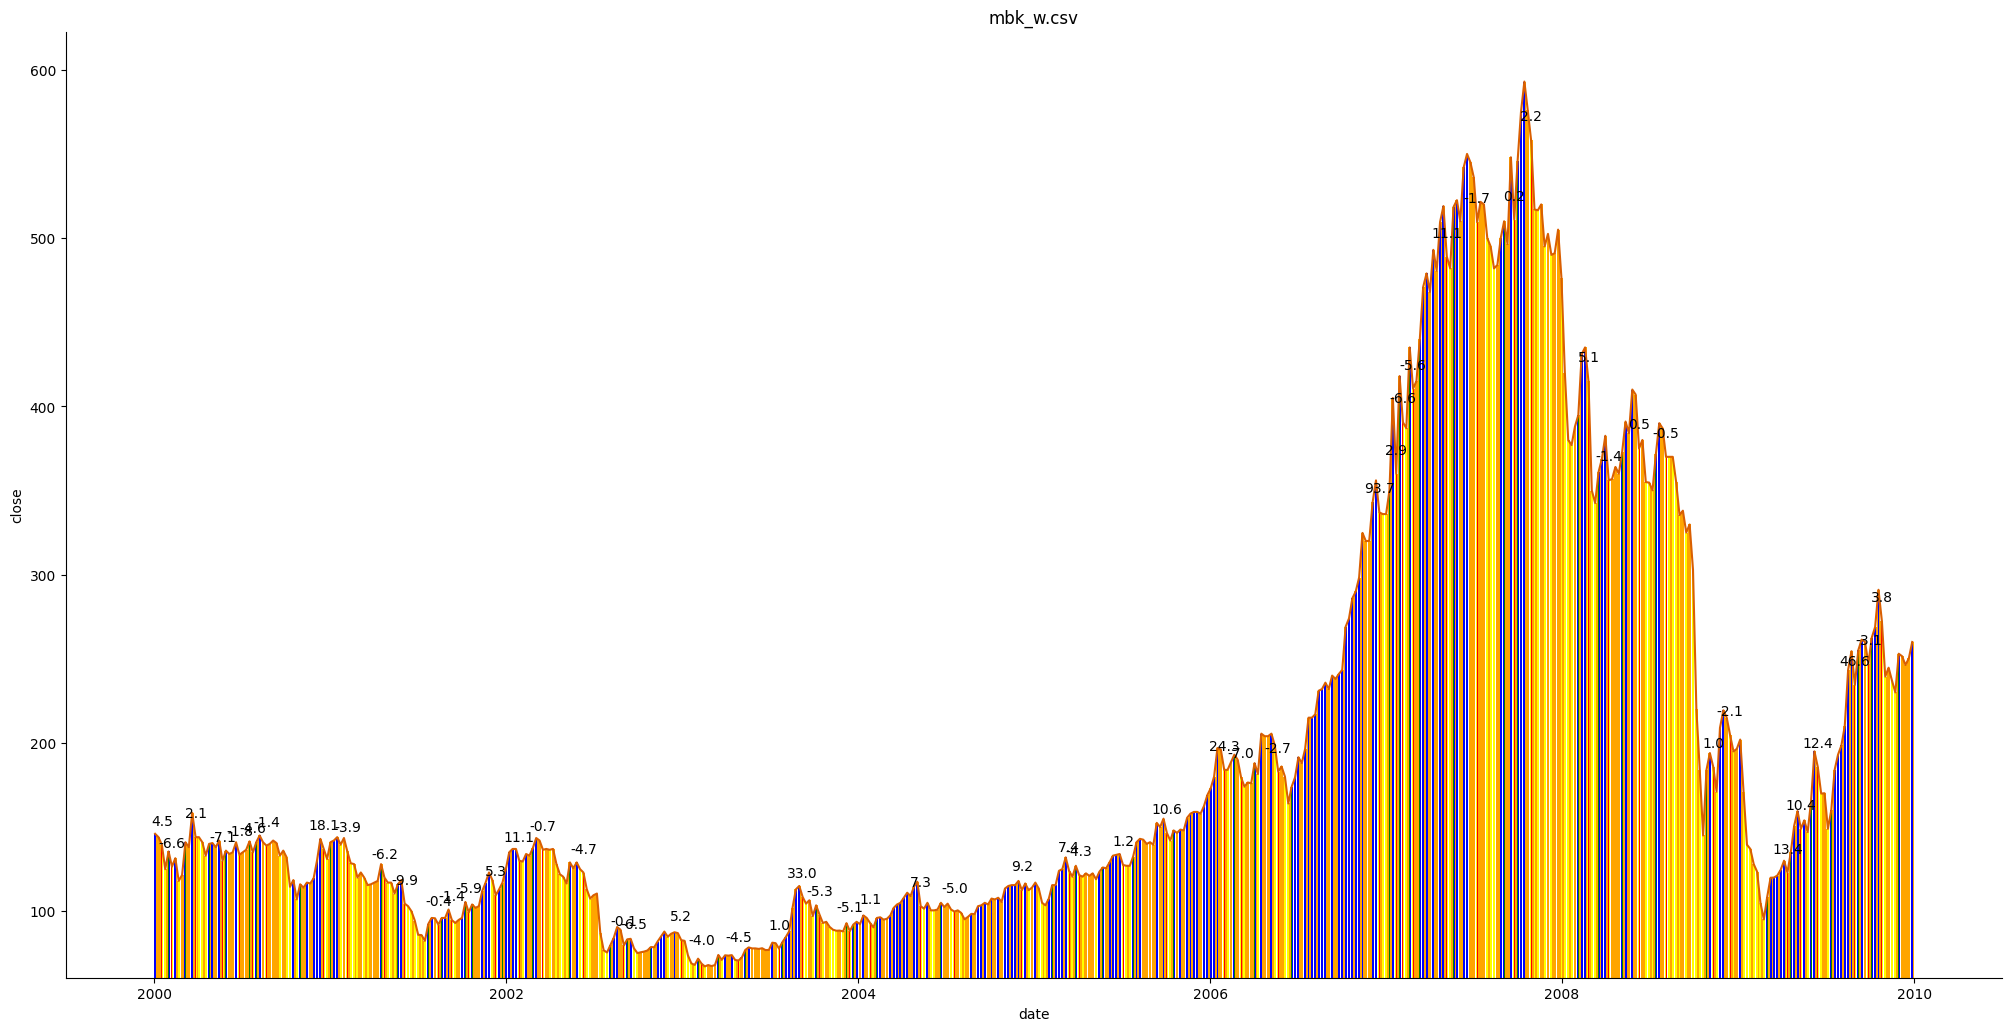

In [22]:
_plot_prices(2000,2009,filename)

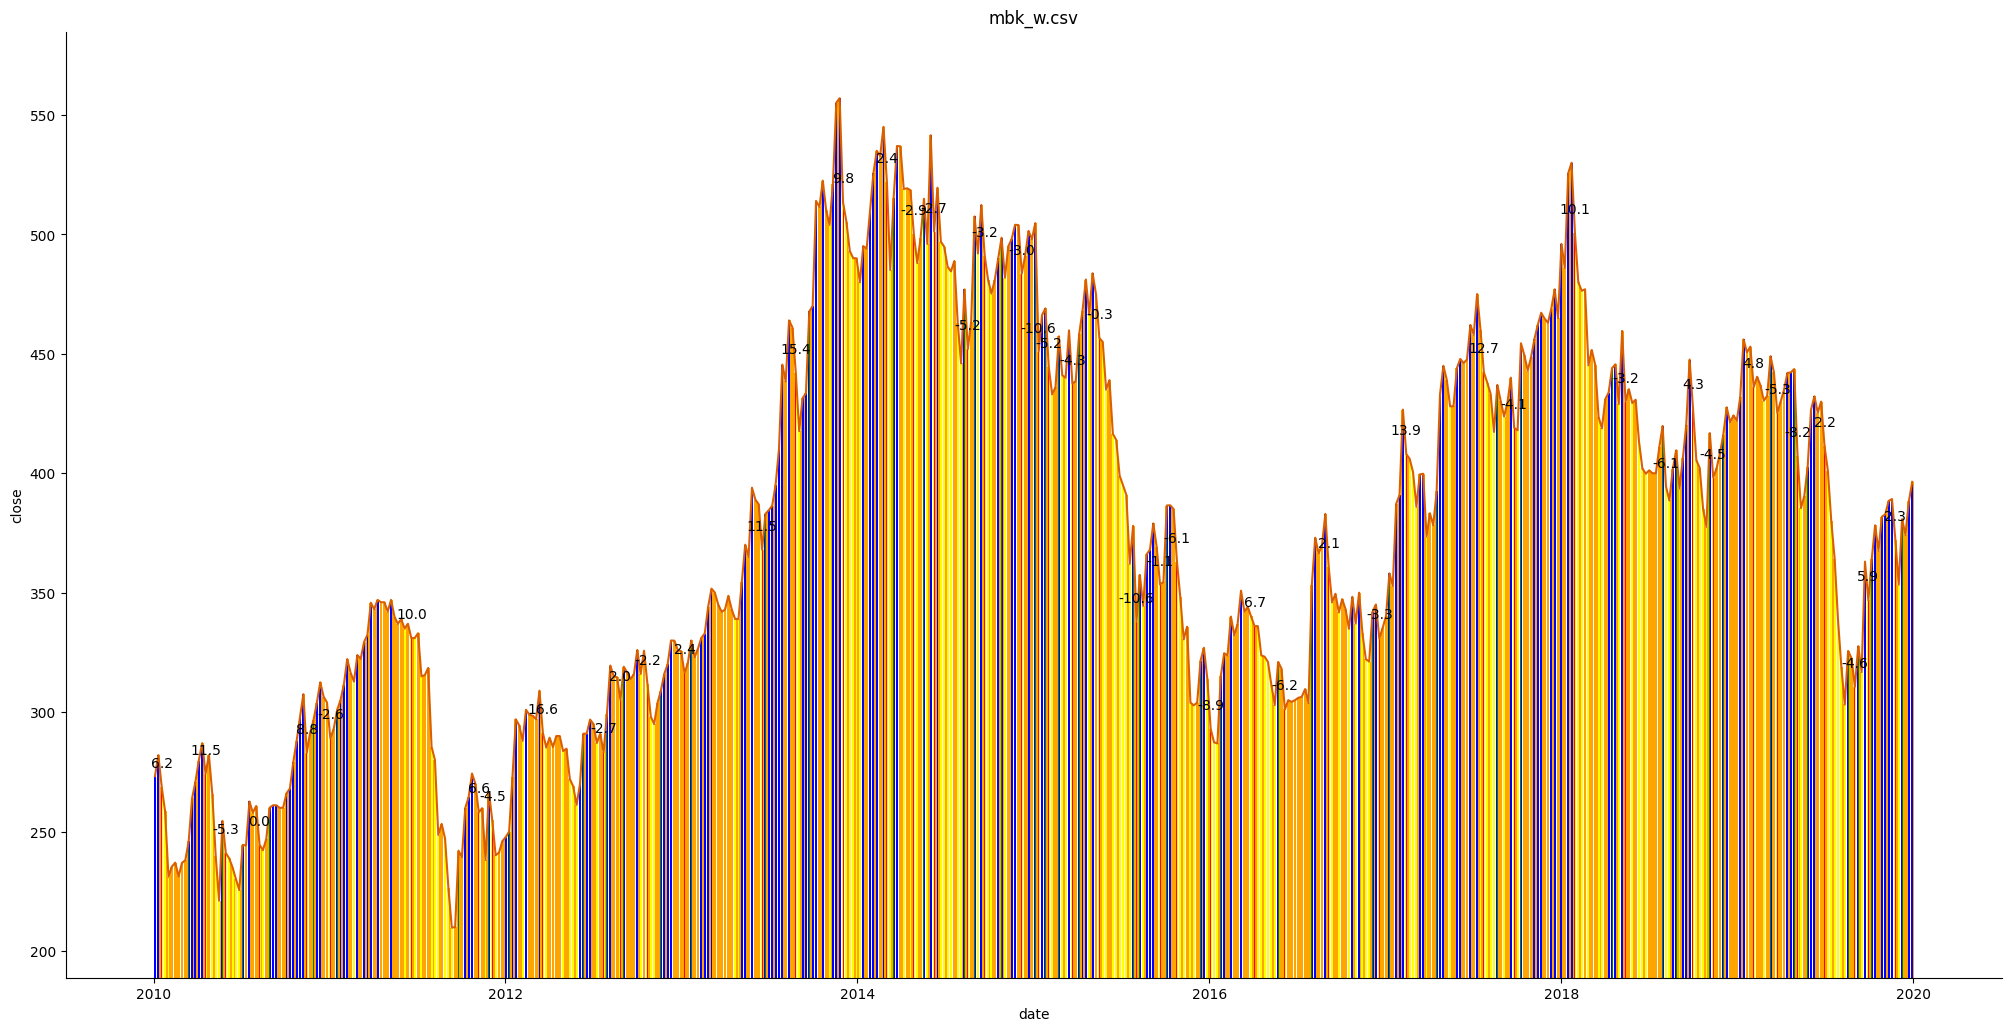

In [24]:
    _plot_prices(2010,2019,filename)